In [25]:
from notebooks import UVyper2 as UV

### 1. Preprocessing

1 . ``org_dataset`` is the path of the dataset
2 . ``preprocessed_dataset`` is name of the preprocessed dataset you need to save as
3 . ``dependent_variable`` is the dependent variable of the dataset
4 . ``ordinal_variables`` is the list of ordinal variables in the dataset
5 . ``parallel_plot_filename`` is the name of the parallel plot image you need to save as

In [26]:
org_dataset = 'cvs_hcb_member_profiling.csv'
preprocessed_dataset = 'cvs_hcb_member_profiling_preprocessed.csv'
dependent_variable = 'individual_id'
ordinal_variables = ['relationship', 'complex_chronic_common_flag']
parallel_plot_filename = 'parallel_plot.png'

#### 1.1. Call the Preprocessing Class

In [27]:
pps = UV.Preprocessing(org_dataset)

#### 1.2. Missing values and zero values table

In [28]:
missing_table = pps.missing_zero_values_table()

#### 1.3. Variable types

In [29]:
for key, value in pps.show_variable_types(pps.vyper(dependent_variable=dependent_variable)).items():
    print(key, ":", value)

individual_id : target_variable
lob : categorical
age_nbr : continuous
gender_cd : binary
marital : binary
income : continuous
aetna_family_size : continuous
aetna_num_children : continuous
aetna_num_children_modif : continuous
relationship : categorical
active_medical_ind : binary
active_dental_ind : binary
active_pharmacy_ind : binary
active_vision_ind : binary
active_medicare_ind : binary
med_mths : exclude
rx_mths : continuous
a2020_medical_ind : exclude
a2020_dental_ind : binary
a2020_vision_ind : binary
a2020_rx_ind : binary
a2020_medicare_ind : binary
final_total_tenure : continuous
final_future_tenure : continuous
dsnp_ind : exclude
mmp_ind : exclude
urbsubr : categorical
state_cd : categorical
tot_allow_amt : continuous
tot_paid_amt : continuous
srv_copay_amt : continuous
rx_allowed_amt : exclude
rx_paid_amt : exclude
rx_copay : exclude
pcp_visit_cnt : continuous
pcp_allowed_amt : continuous
spclty_visit_cnt : continuous
immunization_visit_cnt : continuous
hosop_rad_visit_cnt 

#### 1.4. Recoding

        """
        Method to recode the data
        :param bounds: float - this parameter is used to calculate the quantile function for numeric variables. It determines the range of the bin where the data will be recoded.
        :param min_bin_size: float - this parameter is used to determine whether or not a binary variable should be split into two separate variables. If the proportion of the most frequent value in the binary variable is less than min_bin_size, the variable is left as is. Otherwise, two variables are created: one indicating the presence of the most frequent value, and another indicating the missing values.
        :param dependent_variable: string - this parameter specifies the dependent variable of the dataset. This variable is used to train a vyper model to determine which variables should be recoded.
        :param ordinal_variables: list - this parameter is used to specify which variables should be treated as ordinal variables. If a variable is specified as ordinal, it will be recoded using factorization. If it is not specified as ordinal, it will be treated as a numeric variable and recoded using the quantile function.
        :return: dataframe, list, list, set, list
        """

In [30]:
df, numeric_variables, binary_variables, category_variables, ordinal_variables = pps.recoding(bounds=0.98,
                                                                                              min_bin_size=0.1,
                                                                                              dependent_variable=dependent_variable,
                                                                                              ordinal_variables=ordinal_variables)

Excluded variables (vyper):  {'impactip_allowed_amt', 'op_fertility_allowed_amt', 'hosop_rad_allowed_amt', 'cvs_rx_spec_scripts', 'impactip_allowed_pmpm', 'op_prenatal_visit_cnt', 'total_mail_rx_scripts', 'nba_targeted_ind', 'total_dentalclean_visit_cnt', 'mbr2_me', 'hc_healthmonitor_allowed_amt', 'cm_engaged', 'mbr_total_med_cost', 'mc_non_covid_cnt', 'hc_medicaltest_visit_cnt', 'mbr_premium_or_fees', 'mmp_ind', 'me_mbr_total_med_cost', 'rx_paid_pmpm', 'hc_drugadmin_visit_cnt', 'rx_paid_amt', 'hosop_rad_allowed_pmpm', 'total_spec_rx_scripts', 'er_allowed_amt', 'ip_allowed_amt', 'rx_allowed_pmpm', 'star_gap_ind', 'er_case_cnt', 'mc_paid_amt', 'hc_medicaltest_allowed_amt', 'a2020_medical_ind', 'op_prenatal_allowed_amt', 'mc_covid_paid_amt', 'mc_non_covid_allowed_amt', 'er_mcable_visit_count', 'cvs_rx_retail_scripts', 'er_allowed_pmpm', 'cp_fund_type', 'mc_covid_cnt', 'med_mths', 'hc_woundcare_allowed_amt', 'cvs_cohort', 'rx_allowed_amt', 'hc_drugadmin_allowed_amt', 'rx_copay', 'homecare

#### 1.5. Imputation

Imputation is done using the mean for numeric variables and the mode for binary and categorical variables.


In [31]:
pps.impute_na(numeric_variables, 'mean')
pps.impute_na(binary_variables, 'mode')
pps.impute_na(category_variables, 'mode')

#### 1.6. Correlation

In [32]:
pps.correlation(numeric_variables, ordinal_variables, 0.8)

List of columns removed due to high correlation:  ['max_pulse_processed', 'pcp_allowed_amt_processed', 'pulse_processed', 'ucc_visit_cnt_processed', 'medical_paid_pmpm_processed', 'immunization_visit_cnt_processed', 'medical_copay_pmpm_processed', 'tot_allow_amt_processed', 'tot_paid_amt_processed', 'aetna_num_children_modif_processed', 'aetna_num_children_processed']


lob urbsubr state_cd  op_rehab_allowed_amt_processed  \
0     CSI       S       LA                       50.744111   
1     CFI       U       TX                        0.000000   
2     CSI       U       OH                        0.000000   
3     CFI       R       MN                        0.000000   
4     CSI       U       OH                       50.744111   
...   ...     ...      ...                             ...   
9995  CSI       R       FL                        0.000000   
9996  CSI       U       FL                        0.000000   
9997  CSI       U       TX                        0.000000   
9998  CSI       U       WA                      325.640000   
9999  CFI       U       FL                        0.000000   

      pcp_visit_cnt_processed  hosop_rad_visit_cnt_processed  \
0                    2.328148                       0.268204   
1                    0.000000                       0.000000   
2                    0.000000                       0.000000   
3                    0.000000                       0.000000   
4                    2.328148                       0.268204   
...                       ...                            ...   
9995                 6.000000                       0.000000   
9996                 3.000000                       0.000000   
9997                11.000000                       0.000000   
9998                 2.000000                       0.000000   
9999                 3.000000                       0.000000   

      op_rehab_visit_cnt_processed  strat_score_value_processed  \
0                         0.438246                    49.039475   
1                         0.000000                    49.039475   
2                         0.000000                    49.039475   
3                         0.000000                    49.039475   
4                         0.438246                    49.039475   
...                            ...                          ...   
9995                      0.000000                    93.000000   
9996                      0.000000                    67.000000   
9997                      0.000000                    94.000000   
9998                      1.000000                    54.000000   
9999                      0.000000                    85.000000   

      rx_mths_processed  ucc_allowed_amt_processed  ...  \
0                     0                  45.390472  ...   
1                    12                  68.690000  ...   
2                     0                   0.000000  ...   
3                    12                   0.000000  ...   
4                     0                  45.390472  ...   
...                 ...                        ...  ...   
9995                 12                   0.000000  ...   
9996                  0                 135.000000  ...   
9997                 12                 213.140000  ...   
9998                  0                   0.000000  ...   
9999                 12                   0.000000  ...   

      a2020_medicare_ind_ind  pcp_flag_ind  active_dental_ind_ind  \
0                          0             0                      1   
1                          0             1                      0   
2                          0             1                      0   
3                          0             1                      0   
4                          0             1                      0   
...                      ...           ...                    ...   
9995                       0             0                      0   
9996                       0             0                      0   
9997                       0             0                      0   
9998                       0             0                      0   
9999                       0             0                      0   

      anx_missing_ind  ctd_missing_ind  high_pulse_missing_ind  \
0                   1                1                       1   
1                

List of columns removed due to high correlation:  ['max_pulse_processed', 'pcp_allowed_amt_processed', 'pulse_processed', 'ucc_visit_cnt_processed', 'medical_paid_pmpm_processed', 'immunization_visit_cnt_processed', 'medical_copay_pmpm_processed', 'tot_allow_amt_processed', 'tot_paid_amt_processed', 'aetna_num_children_modif_processed', 'aetna_num_children_processed']


lob urbsubr state_cd  op_rehab_allowed_amt_processed  \
0     CSI       S       LA                       50.744111   
1     CFI       U       TX                        0.000000   
2     CSI       U       OH                        0.000000   
3     CFI       R       MN                        0.000000   
4     CSI       U       OH                       50.744111   
...   ...     ...      ...                             ...   
9995  CSI       R       FL                        0.000000   
9996  CSI       U       FL                        0.000000   
9997  CSI       U       TX                        0.000000   
9998  CSI       U       WA                      325.640000   
9999  CFI       U       FL                        0.000000   

      pcp_visit_cnt_processed  hosop_rad_visit_cnt_processed  \
0                    2.328148                       0.268204   
1                    0.000000                       0.000000   
2                    0.000000                       0.000000   
3                    0.000000                       0.000000   
4                    2.328148                       0.268204   
...                       ...                            ...   
9995                 6.000000                       0.000000   
9996                 3.000000                       0.000000   
9997                11.000000                       0.000000   
9998                 2.000000                       0.000000   
9999                 3.000000                       0.000000   

      op_rehab_visit_cnt_processed  strat_score_value_processed  \
0                         0.438246                    49.039475   
1                         0.000000                    49.039475   
2                         0.000000                    49.039475   
3                         0.000000                    49.039475   
4                         0.438246                    49.039475   
...                            ...                          ...   
9995                      0.000000                    93.000000   
9996                      0.000000                    67.000000   
9997                      0.000000                    94.000000   
9998                      1.000000                    54.000000   
9999                      0.000000                    85.000000   

      rx_mths_processed  ucc_allowed_amt_processed  ...  \
0                     0                  45.390472  ...   
1                    12                  68.690000  ...   
2                     0                   0.000000  ...   
3                    12                   0.000000  ...   
4                     0                  45.390472  ...   
...                 ...                        ...  ...   
9995                 12                   0.000000  ...   
9996                  0                 135.000000  ...   
9997                 12                 213.140000  ...   
9998                  0                   0.000000  ...   
9999                 12                   0.000000  ...   

      a2020_medicare_ind_ind  pcp_flag_ind  active_dental_ind_ind  \
0                          0             0                      1   
1                          0             1                      0   
2                          0             1                      0   
3                          0             1                      0   
4                          0             1                      0   
...                      ...           ...                    ...   
9995                       0             0                      0   
9996                       0             0                      0   
9997                       0             0                      0   
9998                       0             0                      0   
9999                       0             0                      0   

      anx_missing_ind  ctd_missing_ind  high_pulse_missing_ind  \
0                   1                1                       1   
1                

#### 1.7. Cramers V method to calculate correlation between categorical variables and remove highly correlated variables

In [33]:
cramers_matrix = pps.cramers_v_matrix(category_variables, 0.1)

List of columns removed due to higher than the threshold cramers v value:  ['state_cd']
List of columns removed due to higher than the threshold cramers v value:  ['state_cd']


#### 1.8. Category encoding

In [34]:
pps.category_encoding(category_variables)

#### 1.9. Outlier percentage table

In [35]:
outlier_per_table = pps.outlier_percentages(pps.get_df().columns, 6)

#### 1.10. Outlier capping

In [36]:
pps.outlier_capping(pps.get_df().columns, 6)

op_rehab_allowed_amt_processed  pcp_visit_cnt_processed  \
0                          50.744111                 2.328148   
1                           0.000000                 0.000000   
2                           0.000000                 0.000000   
3                           0.000000                 0.000000   
4                          50.744111                 2.328148   
...                              ...                      ...   
9995                        0.000000                 6.000000   
9996                        0.000000                 3.000000   
9997                        0.000000                11.000000   
9998                      325.640000                 2.000000   
9999                        0.000000                 3.000000   

      hosop_rad_visit_cnt_processed  op_rehab_visit_cnt_processed  \
0                          0.268204                      0.438246   
1                          0.000000                      0.000000   
2                          0.000000                      0.000000   
3                          0.000000                      0.000000   
4                          0.268204                      0.438246   
...                             ...                           ...   
9995                       0.000000                      0.000000   
9996                       0.000000                      0.000000   
9997                       0.000000                      0.000000   
9998                       0.000000                      1.000000   
9999                       0.000000                      0.000000   

      strat_score_value_processed  rx_mths_processed  \
0                       49.039475                  0   
1                       49.039475                 12   
2                       49.039475                  0   
3                       49.039475                 12   
4                       49.039475                  0   
...                           ...                ...   
9995                    93.000000                 12   
9996                    67.000000                  0   
9997                    94.000000                 12   
9998                    54.000000                  0   
9999                    85.000000                 12   

      ucc_allowed_amt_processed  srv_copay_amt_processed  \
0                     45.390472               144.613676   
1                     68.690000                 0.000000   
2                      0.000000                 0.000000   
3                      0.000000                40.000000   
4                     45.390472               144.613676   
...                         ...                      ...   
9995                   0.000000               175.000000   
9996                 135.000000               135.000000   
9997                 213.140000                 0.000000   
9998                   0.000000                15.000000   
9999                   0.000000               885.000000   

      hosop_lab_visit_cnt_processed  final_total_tenure_processed  ...  \
0                          0.470162                    100.000000  ...   
1                          1.000000                     65.698627  ...   
2                          0.000000                     65.698627  ...   
3                          1.000000                     65.698627  ...   
4                          0.470162                     65.698627  ...   
...                             ...                           ...  ...   
9995                       0.000000                     68.670000  ...   
9996                       0.000000                     84.090000  ...   
9997                       0.000000                     53.020000  ...   
9998                       0.000000                    100.000000  ...   
9999                       0.000000                     33.710000  ...   

      high_pulse_ind  dep_missing_ind  gender_cd_ind  dia_missing_ind  \
0                  0                1   

op_rehab_allowed_amt_processed  pcp_visit_cnt_processed  \
0                          50.744111                 2.328148   
1                           0.000000                 0.000000   
2                           0.000000                 0.000000   
3                           0.000000                 0.000000   
4                          50.744111                 2.328148   
...                              ...                      ...   
9995                        0.000000                 6.000000   
9996                        0.000000                 3.000000   
9997                        0.000000                11.000000   
9998                      325.640000                 2.000000   
9999                        0.000000                 3.000000   

      hosop_rad_visit_cnt_processed  op_rehab_visit_cnt_processed  \
0                          0.268204                      0.438246   
1                          0.000000                      0.000000   
2                          0.000000                      0.000000   
3                          0.000000                      0.000000   
4                          0.268204                      0.438246   
...                             ...                           ...   
9995                       0.000000                      0.000000   
9996                       0.000000                      0.000000   
9997                       0.000000                      0.000000   
9998                       0.000000                      1.000000   
9999                       0.000000                      0.000000   

      strat_score_value_processed  rx_mths_processed  \
0                       49.039475                  0   
1                       49.039475                 12   
2                       49.039475                  0   
3                       49.039475                 12   
4                       49.039475                  0   
...                           ...                ...   
9995                    93.000000                 12   
9996                    67.000000                  0   
9997                    94.000000                 12   
9998                    54.000000                  0   
9999                    85.000000                 12   

      ucc_allowed_amt_processed  srv_copay_amt_processed  \
0                     45.390472               144.613676   
1                     68.690000                 0.000000   
2                      0.000000                 0.000000   
3                      0.000000                40.000000   
4                     45.390472               144.613676   
...                         ...                      ...   
9995                   0.000000               175.000000   
9996                 135.000000               135.000000   
9997                 213.140000                 0.000000   
9998                   0.000000                15.000000   
9999                   0.000000               885.000000   

      hosop_lab_visit_cnt_processed  final_total_tenure_processed  ...  \
0                          0.470162                    100.000000  ...   
1                          1.000000                     65.698627  ...   
2                          0.000000                     65.698627  ...   
3                          1.000000                     65.698627  ...   
4                          0.470162                     65.698627  ...   
...                             ...                           ...  ...   
9995                       0.000000                     68.670000  ...   
9996                       0.000000                     84.090000  ...   
9997                       0.000000                     53.020000  ...   
9998                       0.000000                    100.000000  ...   
9999                       0.000000                     33.710000  ...   

      high_pulse_ind  dep_missing_ind  gender_cd_ind  dia_missing_ind  \
0                  0                1   

#### 1.11. Standardization

In [37]:
pps.standardization()

op_rehab_allowed_amt_processed  pcp_visit_cnt_processed  \
0                           0.005641                 0.000000   
1                          -0.479299                -1.093376   
2                          -0.479299                -1.093376   
3                          -0.479299                -1.093376   
4                           0.005641                 0.000000   
...                              ...                      ...   
9995                       -0.479299                 1.724425   
9996                       -0.479299                 0.315524   
9997                       -0.479299                 4.072593   
9998                        2.632707                -0.154109   
9999                       -0.479299                 0.315524   

      hosop_rad_visit_cnt_processed  op_rehab_visit_cnt_processed  \
0                          0.002309                 -9.462081e-17   
1                         -0.455583                 -7.470064e-01   
2                         -0.455583                 -7.470064e-01   
3                         -0.455583                 -7.470064e-01   
4                          0.002309                 -9.462081e-17   
...                             ...                           ...   
9995                      -0.455583                 -7.470064e-01   
9996                      -0.455583                 -7.470064e-01   
9997                      -0.455583                 -7.470064e-01   
9998                      -0.455583                  9.575305e-01   
9999                      -0.455583                 -7.470064e-01   

      strat_score_value_processed  rx_mths_processed  \
0                        0.000000          -0.783550   
1                        0.000000           1.280915   
2                        0.000000          -0.783550   
3                        0.000000           1.280915   
4                        0.000000          -0.783550   
...                           ...                ...   
9995                     1.542304           1.280915   
9996                     0.630124          -0.783550   
9997                     1.577388           1.280915   
9998                     0.174034          -0.783550   
9999                     1.261633           1.280915   

      ucc_allowed_amt_processed  srv_copay_amt_processed  \
0                  7.410155e-17                 0.004508   
1                  2.429877e-01                -0.580800   
2                 -4.733712e-01                -0.580800   
3                 -4.733712e-01                -0.418904   
4                  7.410155e-17                 0.004508   
...                         ...                      ...   
9995              -4.733712e-01                 0.127493   
9996               9.345258e-01                -0.034402   
9997               1.749437e+00                -0.580800   
9998              -4.733712e-01                -0.520089   
9999              -4.733712e-01                 3.001139   

      hosop_lab_visit_cnt_processed  final_total_tenure_processed  ...  \
0                      5.755740e-17                  1.604681e+00  ...   
1                      5.493686e-01                 -6.648098e-16  ...   
2                     -4.874933e-01                 -6.648098e-16  ...   
3                      5.493686e-01                 -6.648098e-16  ...   
4                      5.755740e-17                 -6.648098e-16  ...   
...                             ...                           ...  ...   
9995                  -4.874933e-01                  1.390063e-01  ...   
9996                  -4.874933e-01                  8.603820e-01  ...   
9997                  -4.874933e-01                 -5.931293e-01  ...   
9998                  -4.874933e-01                  1.604681e+00  ...   
9999                  -4.874933e-01                 -1.496486e+00  ...   

      high_pulse_ind  dep_missing_ind  gender_cd_ind  dia_missing_ind  \
0          -0.359413         2.205698   

op_rehab_allowed_amt_processed  pcp_visit_cnt_processed  \
0                           0.005641                 0.000000   
1                          -0.479299                -1.093376   
2                          -0.479299                -1.093376   
3                          -0.479299                -1.093376   
4                           0.005641                 0.000000   
...                              ...                      ...   
9995                       -0.479299                 1.724425   
9996                       -0.479299                 0.315524   
9997                       -0.479299                 4.072593   
9998                        2.632707                -0.154109   
9999                       -0.479299                 0.315524   

      hosop_rad_visit_cnt_processed  op_rehab_visit_cnt_processed  \
0                          0.002309                 -9.462081e-17   
1                         -0.455583                 -7.470064e-01   
2                         -0.455583                 -7.470064e-01   
3                         -0.455583                 -7.470064e-01   
4                          0.002309                 -9.462081e-17   
...                             ...                           ...   
9995                      -0.455583                 -7.470064e-01   
9996                      -0.455583                 -7.470064e-01   
9997                      -0.455583                 -7.470064e-01   
9998                      -0.455583                  9.575305e-01   
9999                      -0.455583                 -7.470064e-01   

      strat_score_value_processed  rx_mths_processed  \
0                        0.000000          -0.783550   
1                        0.000000           1.280915   
2                        0.000000          -0.783550   
3                        0.000000           1.280915   
4                        0.000000          -0.783550   
...                           ...                ...   
9995                     1.542304           1.280915   
9996                     0.630124          -0.783550   
9997                     1.577388           1.280915   
9998                     0.174034          -0.783550   
9999                     1.261633           1.280915   

      ucc_allowed_amt_processed  srv_copay_amt_processed  \
0                  7.410155e-17                 0.004508   
1                  2.429877e-01                -0.580800   
2                 -4.733712e-01                -0.580800   
3                 -4.733712e-01                -0.418904   
4                  7.410155e-17                 0.004508   
...                         ...                      ...   
9995              -4.733712e-01                 0.127493   
9996               9.345258e-01                -0.034402   
9997               1.749437e+00                -0.580800   
9998              -4.733712e-01                -0.520089   
9999              -4.733712e-01                 3.001139   

      hosop_lab_visit_cnt_processed  final_total_tenure_processed  ...  \
0                      5.755740e-17                  1.604681e+00  ...   
1                      5.493686e-01                 -6.648098e-16  ...   
2                     -4.874933e-01                 -6.648098e-16  ...   
3                      5.493686e-01                 -6.648098e-16  ...   
4                      5.755740e-17                 -6.648098e-16  ...   
...                             ...                           ...  ...   
9995                  -4.874933e-01                  1.390063e-01  ...   
9996                  -4.874933e-01                  8.603820e-01  ...   
9997                  -4.874933e-01                 -5.931293e-01  ...   
9998                  -4.874933e-01                  1.604681e+00  ...   
9999                  -4.874933e-01                 -1.496486e+00  ...   

      high_pulse_ind  dep_missing_ind  gender_cd_ind  dia_missing_ind  \
0          -0.359413         2.205698   

#### 1.12. Save the preprocessed dataset as ``preprocessed_dataset``

In [38]:
pps.save_preprocessed_data(preprocessed_dataset)

### 2. Clustering

#### 2.1. Call the UVyper Class

In [39]:
uv = UV.UVyper(preprocessed_dataset=preprocessed_dataset, outlier_per=outlier_per_table, cramers_matrix=cramers_matrix, missing_values_table=missing_table)

#### 2.2. KMeans clustering

        Method to find the clusters using KMeans.
        :param minK: int - The minimum number of clusters to consider.
        :param maxK: int - The maximum number of clusters to consider.
        :param metric: str - optional (default='distortion'). The metric used to quantify the
        quality of clustering. Possible options include distortion, silhouette, calinski_harabasz,
        davies_bouldin, and others.
        :param min_size_per: float - percentage of minimum size of cluster
        :param max_size_per: float - percentage of maximum size of cluster
        :param rand_sample_prop: float - random sampling proportion
        :param filename:  float - path of the pickle file
        :param dataset: float - path of the original dataset
        :param n_clusters: int - no of clusters
        :param option: int - 1 - to save the model and 0 - not to save the model
        :return: ndarray - cluster labels

If ``n_clusters`` is not specified, the optimal number of clusters is determined using the elbow method.

In [40]:
kmeans_cluster_labels = uv.kmeans_w(minK=3, maxK=10, metric='distortion', min_size_per=5, max_size_per=100,
                                    rand_sample_prop=0.2,
                                    filename='kmeanModel.pkl', dataset=org_dataset, n_clusters=4)

Performing KMeans Clustering...
   cluster  count  percentage   Model
0        0   2490        0.25  Kmeans
1        1   2509        0.25  Kmeans
2        2   2496        0.25  Kmeans
3        3   2505        0.25  Kmeans
    Model  Silhouette  Davies Bouldin  n_clusters
0  KMeans    0.571686        0.500076           4
   individual_id    age_nbr   marital         income  aetna_family_size  \
0         8755.5  41.813655  0.617269  101725.236170           2.773896   
1         1255.0  42.590674  0.607812   98170.355507           2.699482   
2         6262.5  42.843750  0.599359   99552.074842           2.655849   
3         3762.0  42.749701  0.637525  100541.847486           2.707385   

   aetna_num_children  aetna_num_children_modif  active_medical_ind  \
0            1.233735                  1.233735            0.766681   
1            1.173376                  1.173376            0.760183   
2            1.146234                  1.146234            0.771776   
3            1.161

#### 2.3. Hierarchical clustering

        Method to perform hierarchical clustering.
        :param param_grid: dict - parameters grid
        :param folds: int - number of folds
        :param n_iter: int - number of iterations
        :param rand_sample_prop: float - random sample proportion
        :param dataset: str - path to the original dataset
        :param n_clusters: int - number of clusters
        :param linkage: str - linkage
        :param affinity: str - affinity
        :return: ndarray - cluster labels
If ``n_clusters`` or ``linkage`` or ``affinity`` is not specified, that parameter is determined using the randomizedsearchcv method.

In [41]:
hierarchical_cluster_labels = uv.hierarchical_w(param_grid={"linkage": ["ward", "complete", "average", "single"],
                                                            "n_clusters": list(range(3, 11)),
                                                            "affinity": ["euclidean", "l1", "l2", "manhattan",
                                                                         "cosine"]}, folds=5, n_iter=10,
                                                rand_sample_prop=0.3, dataset=org_dataset, linkage='average',
                                                n_clusters=3, affinity='l1')

Performing Hierarchical Clustering...
   cluster  count  percentage         Model
0        0   4743        0.47  Hierarchical
1        1   2887        0.29  Hierarchical
2        2   2370        0.24  Hierarchical
          Model  Silhouette  Davies Bouldin  n_clusters
0  Hierarchical    0.557993        0.500056           3
   individual_id    age_nbr   marital         income  aetna_family_size  \
0    7629.000000  42.408602  0.609530  100814.337709           2.723593   
1    3813.999654  42.602009  0.632837  100250.886565           2.695878   
2    1185.500422  42.559494  0.606329   98040.490524           2.696203   

   aetna_num_children  aetna_num_children_modif  active_medical_ind  \
0            1.198187                  1.198187            0.768926   
1            1.153446                  1.153446            0.766920   
2            1.170042                  1.170042            0.760229   

   active_dental_ind  active_pharmacy_ind  ...  pcp_flag  teledoc_visit  \
0           0

#### 2.4. GMM clustering


        Method to perform Gaussian Mixture Model clustering.
        :param param_grid: dict - The parameters to be used for the randomized search cross validation.
        :param folds: int - The number of folds to be used for the cross validation.
        :param n_iter: int - The number of iterations to be used for the randomized search cross validation.
        :param rand_sample_prop: float - random sample proportion
        :param filename: str - path to the pickle file
        :param dataset: str - path to the original dataset
        :param n_components: int - number of components
        :param covariance_type: str - covariance type
        :param init_params: str - initialization parameters
        :param option: int - 1 - to save the model and 0 - not to save the model
        :return: cluster labels
If ``n_components`` or ``covariance_type`` or ``init_params`` is not specified, that parameter is determined using the randomizedsearchcv method.

In [42]:
gmm_cluster_labels = uv.gmm_w(param_grid={'n_components': list(range(3, 11)),
                                          'covariance_type': ['full', 'tied', 'diag', 'spherical'],
                                          'init_params': ['kmeans',
                                                          'random']}, folds=5, n_iter=10, rand_sample_prop=0.3,
                              filename='gmmModel.pkl',
                              dataset=org_dataset, n_components=3, covariance_type='spherical',
                              init_params='kmeans')

Performing GMM Clustering...
   cluster  count  percentage Model
0        0   3334        0.33   GMM
1        1   3338        0.33   GMM
2        2   3328        0.33   GMM
  Model  Silhouette  Davies Bouldin  n_clusters
0   GMM    0.590038        0.500047           3
   individual_id    age_nbr   marital         income  aetna_family_size  \
0         5005.5  42.907918  0.612478  100412.073843           2.676365   
1         1669.5  42.508688  0.617735   98495.663047           2.711204   
2         8336.5  42.083233  0.616286  101078.515985           2.739784   

   aetna_num_children  aetna_num_children_modif  active_medical_ind  \
0            1.152070                  1.152070            0.771330   
1            1.177352                  1.177352            0.760062   
2            1.206430                  1.206430            0.767493   

   active_dental_ind  active_pharmacy_ind  ...  pcp_flag  teledoc_visit  \
0           0.185696             0.365433  ...  0.672166       3.54166

#### 2.5. Birch clustering

        Method to perform Birch clustering.
        :param param_grid: dict - The parameters to be used for the randomized search cross validation.
        :param folds: int - The number of folds to be used for the cross validation.
        :param n_iter: int - The number of iterations to be used for the randomized search cross validation.
        :param rand_sample_prop: float - random sample proportion
        :param filename: str - path to the pickle file
        :param dataset: str - path to the original dataset
        :param n_clusters: int - number of clusters
        :param branching_factor: int - branching factor
        :param threshold: int - threshold
        :param option: int - 1 - to save the model and 0 - not to save the model
        :return: ndarray - The cluster labels.
If ``n_clusters`` or ``threshold`` or ``branching_factor`` is not specified, that parameter is determined using the randomizedsearchcv method.

In [43]:
birch_cluster_labels = uv.birch_w(
    param_grid={"n_clusters": list(range(3, 11)), "branching_factor": [50, 100, 200, 300, 400, 500],
                "threshold": [0.2, 0.3, 0.4, 0.5]}, folds=5, n_iter=10, rand_sample_prop=0.3,
    filename='birchModel.pkl', dataset=org_dataset, n_clusters=3, threshold=0.5, branching_factor=300)

Performing Birch Clustering...
   cluster  count  percentage  Model
0        0   3818        0.38  Birch
1        1   3414        0.34  Birch
2        2   2768        0.28  Birch
   Model  Silhouette  Davies Bouldin  n_clusters
0  Birch    0.573889        0.500054           3
   individual_id    age_nbr   marital         income  aetna_family_size  \
0    1909.500000  42.481404  0.620744   98988.650998           2.711367   
1    8293.499414  42.037786  0.615993  101140.347471           2.745460   
2    5202.500723  43.096460  0.607659   99967.437766           2.661127   

   aetna_num_children  aetna_num_children_modif  active_medical_ind  \
0            1.175746                  1.175746            0.761047   
1            1.212068                  1.212068            0.769043   
2            1.141257                  1.141257            0.770132   

   active_dental_ind  active_pharmacy_ind  ...  pcp_flag  teledoc_visit  \
0           0.191489             0.362793  ...  0.683866      

#### 2.6. Kmedoids clustering

Performing Kmedoids Clustering...


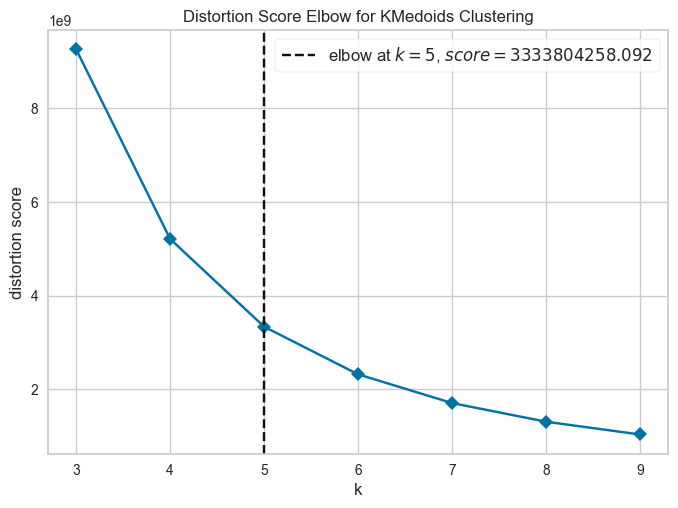

   cluster  count  percentage     Model
0        0   1998         0.2  Kmedoids
1        1   1999         0.2  Kmedoids
2        2   2011         0.2  Kmedoids
3        3   1995         0.2  Kmedoids
4        4   1997         0.2  Kmedoids
      Model  Silhouette  Davies Bouldin  n_clusters
0  Kmedoids    0.560674        0.500125           5
   individual_id    age_nbr   marital         income  aetna_family_size  \
0         2996.5  42.433934  0.633133   99504.364102           2.713714   
1         6990.0  43.110555  0.607804  100971.075419           2.669335   
2         8995.0  41.585778  0.614620  101238.167046           2.776231   
3         4993.0  42.728321  0.612030   99333.642943           2.686717   
4          999.0  42.648473  0.609915   98909.412627           2.699049   

   aetna_num_children  aetna_num_children_modif  active_medical_ind  \
0            1.173674                  1.173674            0.758442   
1            1.158579                  1.158579            0.76

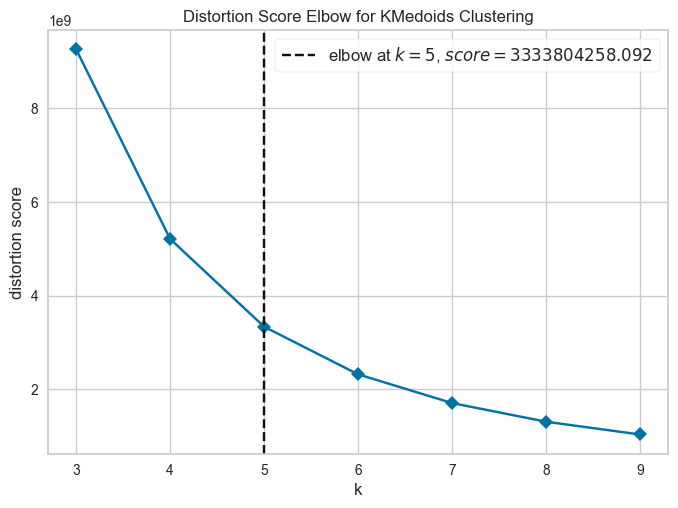

   cluster  count  percentage     Model
0        0   1998         0.2  Kmedoids
1        1   1999         0.2  Kmedoids
2        2   2011         0.2  Kmedoids
3        3   1995         0.2  Kmedoids
4        4   1997         0.2  Kmedoids
      Model  Silhouette  Davies Bouldin  n_clusters
0  Kmedoids    0.560674        0.500125           5
   individual_id    age_nbr   marital         income  aetna_family_size  \
0         2996.5  42.433934  0.633133   99504.364102           2.713714   
1         6990.0  43.110555  0.607804  100971.075419           2.669335   
2         8995.0  41.585778  0.614620  101238.167046           2.776231   
3         4993.0  42.728321  0.612030   99333.642943           2.686717   
4          999.0  42.648473  0.609915   98909.412627           2.699049   

   aetna_num_children  aetna_num_children_modif  active_medical_ind  \
0            1.173674                  1.173674            0.758442   
1            1.158579                  1.158579            0.76

In [44]:
kmedoids_cluster_labels = uv.kmedoids_w(minK=3, maxK=10, metric='distortion',
                                        rand_sample_prop=0.2,
                                        filename='kmedoidsModel.pkl', dataset=org_dataset)

#### 2.7. Minibatchkmeans clustering

Performing MiniBatchKmeans Clustering...


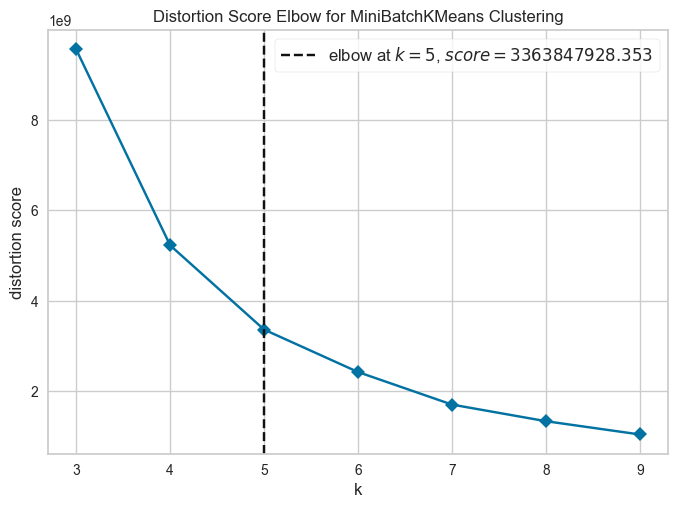

   cluster  count  percentage            Model
0        0   2021        0.20  MiniBatchKmeans
1        1   1958        0.20  MiniBatchKmeans
2        2   2146        0.21  MiniBatchKmeans
3        3   1833        0.18  MiniBatchKmeans
4        4   2042        0.20  MiniBatchKmeans
             Model  Silhouette  Davies Bouldin  n_clusters
0  MiniBatchKmeans    0.560014        0.500127           5
   individual_id    age_nbr   marital         income  aetna_family_size  \
0         5199.0  42.660564  0.601188   98573.217462           2.656606   
1         7188.5  43.037283  0.613892  102527.045595           2.702247   
2         1073.5  42.673346  0.608574   98332.240379           2.701305   
3         9084.0  41.410256  0.613202  100546.690554           2.774686   
4         3167.5  42.622919  0.640548  100215.066774           2.716944   

   aetna_num_children  aetna_num_children_modif  active_medical_ind  \
0            1.138545                  1.138545            0.771028   
1      

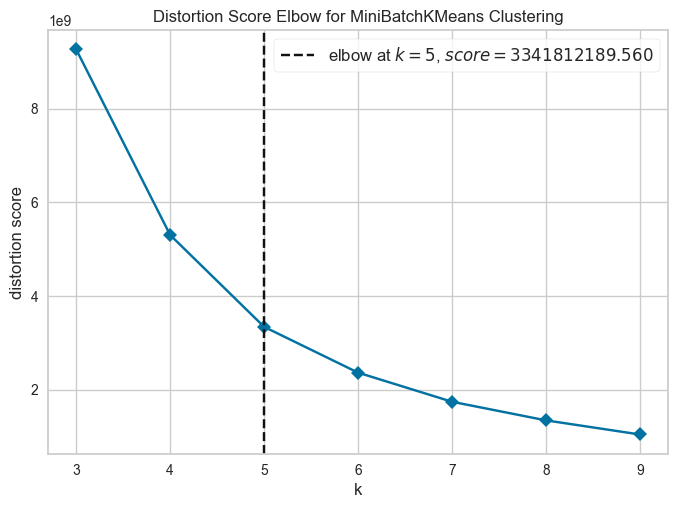

   cluster  count  percentage            Model
0        0   2202        0.22  MiniBatchKmeans
1        1   1669        0.17  MiniBatchKmeans
2        2   2031        0.20  MiniBatchKmeans
3        3   2246        0.22  MiniBatchKmeans
4        4   1852        0.19  MiniBatchKmeans
             Model  Silhouette  Davies Bouldin  n_clusters
0  MiniBatchKmeans    0.558786        0.500124           5
   individual_id    age_nbr   marital         income  aetna_family_size  \
0         6653.5  42.849682  0.611262   99603.032345           2.689827   
1          835.0  42.319353  0.600959   98470.290356           2.677651   
2         4537.0  42.778434  0.620384  100749.630870           2.682915   
3         8877.5  41.863313  0.612199  101879.940042           2.762689   
4         2595.5  42.714903  0.632289   98722.824257           2.724082   

   aetna_num_children  aetna_num_children_modif  active_medical_ind  \
0            1.173933                  1.173933            0.772770   
1      

In [45]:
mini_batch_kmeans_cluster_labels = uv.minibatchkmeans_w(minK=3, maxK=10, metric='distortion',
                                                        rand_sample_prop=0.2,
                                                        filename='minibatchkmeansModel.pkl', dataset=org_dataset)

### 3. Model Selection

#### 3.1. Model Selection and Model Summary

Score table of all the models

In [46]:
recommended_model = uv.get_models_summary()

             Model  Silhouette  Davies Bouldin  n_clusters  Rank
2              GMM    0.590038        0.500047           3   1.0
3            Birch    0.573889        0.500054           3   2.0
0           KMeans    0.571686        0.500076           4   3.0
1     Hierarchical    0.557993        0.500056           3   4.0
4         Kmedoids    0.560674        0.500125           5   4.0
5  MiniBatchKmeans    0.560014        0.500127           5   5.0
Recommended Model:  GMM
             Model  Silhouette  Davies Bouldin  n_clusters  Rank
2              GMM    0.590033        0.500047           3   1.0
3            Birch    0.573889        0.500054           3   2.0
0           KMeans    0.571686        0.500076           4   3.0
1     Hierarchical    0.557993        0.500056           3   4.0
4         Kmedoids    0.560674        0.500125           5   5.0
5  MiniBatchKmeans    0.558786        0.500124           5   5.0
Recommended Model:  GMM


### 4. Postprocessing

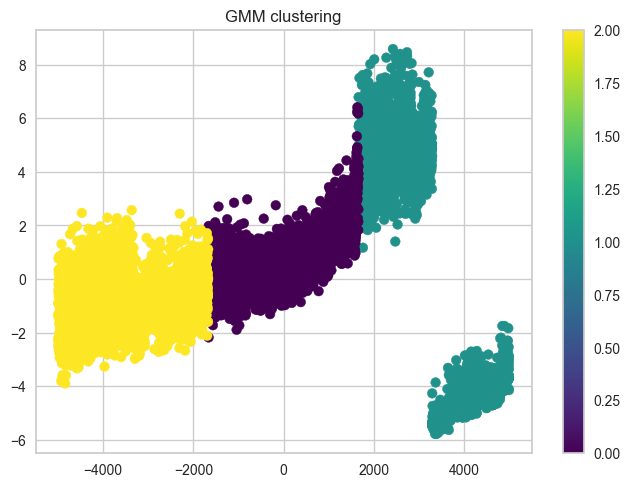

Cluster 1 classification counts:

 0    6662
1    3338
Name: Binary Cluster 1, dtype: int64
Cluster 0 classification counts:

 0    6666
1    3334
Name: Binary Cluster 0, dtype: int64
Cluster 2 classification counts:

 0    6672
1    3328
Name: Binary Cluster 2, dtype: int64
Differential Factors: 
age_nbr
income
first_pulse
pulse
max_pulse


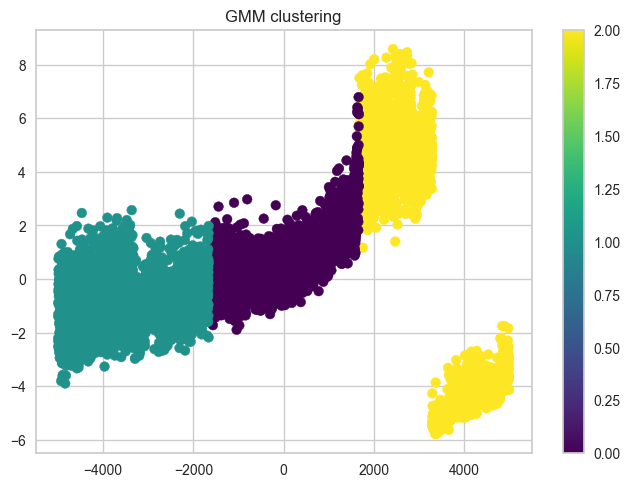

Cluster 2 classification counts:

 0    6672
1    3328
Name: Binary Cluster 2, dtype: int64


In [23]:
pc = uv.post_process(recommended_model=recommended_model, org_dataset=org_dataset,
                     dependent_variable=dependent_variable,
                     preprocessed_dataset=preprocessed_dataset, filename=parallel_plot_filename,
                     kmeans_cluster_labels=kmeans_cluster_labels,
                     hierarchical_cluster_labels=hierarchical_cluster_labels,
                     gmm_cluster_labels=gmm_cluster_labels, birch_cluster_labels=birch_cluster_labels,
                     kmedoids_cluster_labels=kmedoids_cluster_labels,
                     mini_batch_kmeans_cluster_labels=mini_batch_kmeans_cluster_labels,
                     n_variables=5)

### 5. Playbook

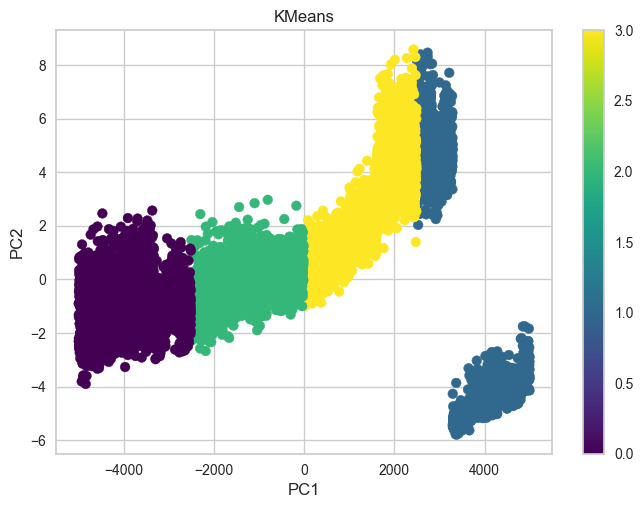

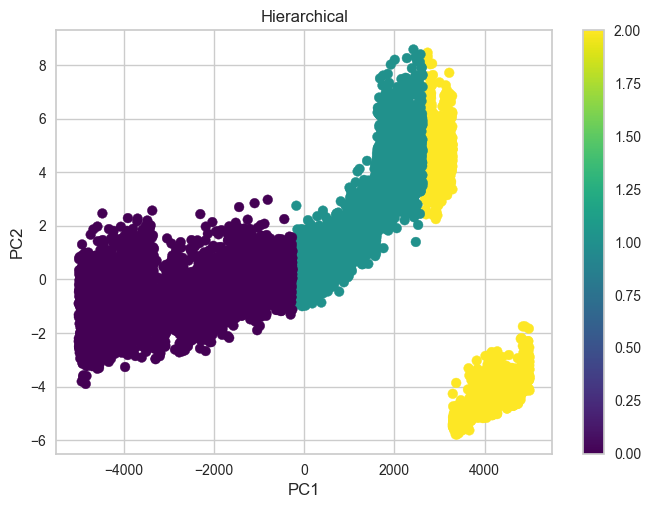

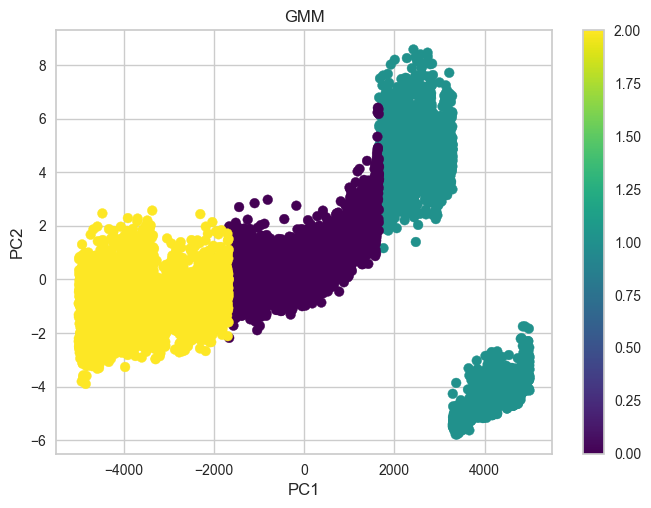

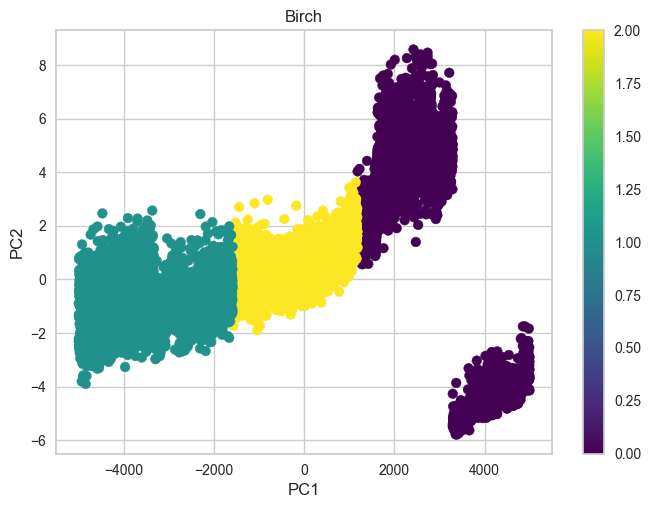

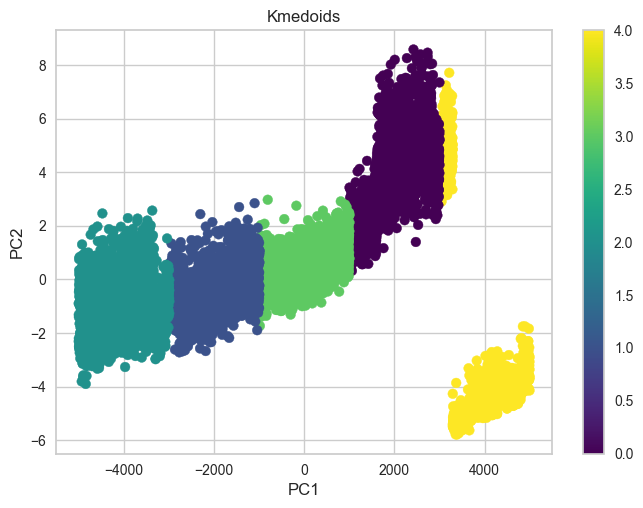

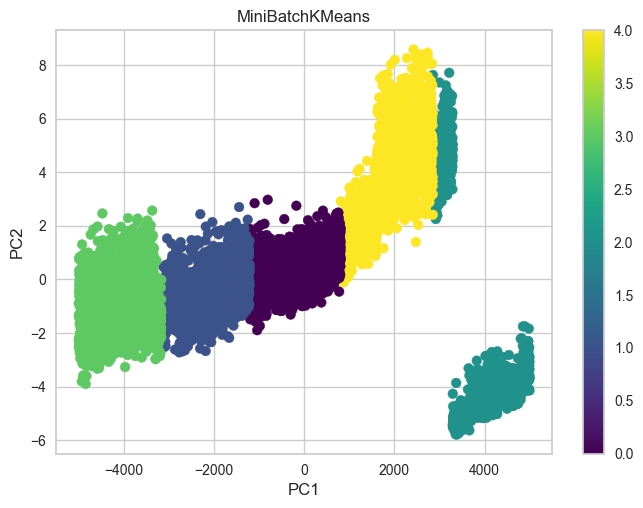

In [24]:
uv.playbook(filename='playbook_5.xlsx', org_dataset=org_dataset, dependent_variable=dependent_variable,
            im=parallel_plot_filename,
            pca=pc, kmeans_cluster_labels=kmeans_cluster_labels,
            hierarchical_cluster_labels=hierarchical_cluster_labels, gmm_cluster_labels=gmm_cluster_labels,
            birch_cluster_labels=birch_cluster_labels, kmedoids_cluster_labels=kmedoids_cluster_labels,
            mini_batch_kmeans_cluster_labels=mini_batch_kmeans_cluster_labels, to_delete=False)